In [1]:
import numpy as np
import pandas as pd
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from nltk.corpus import stopwords
sw=stopwords.words("english")

In [260]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_colwidth', -1)

# gathering and formating

In [3]:
folder_name ='Supporting Materials'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

wb b is for writing image file

In [4]:
url= ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',
     'https://video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv',
     'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt']
for i in url:
    response = requests.get(i)
    with open(os.path.join(folder_name,i.split('/')[-1]), mode='wb') as f:
        f.write(response.content)

In [5]:
archive_df=pd.read_csv('Supporting Materials/twitter-archive-enhanced-2.csv')

In [6]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
image_df = pd.read_csv('Supporting Materials/image-predictions.tsv',sep='\t')

In [8]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ## obtain json file from API, change to code format when needed
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit =True,wait_on_rate_limit_notify=True)

id_of_tweet=archive_df['tweet_id'].values

t0=time.time()
fails=[]
with open('tweet_json.txt','w') as f:
    count=0
    for i in id_of_tweet:
        count+=1
        print(count,':', i)
        try:
            tweet = api.get_status(i,tweet_mode='extended')
            print('success')
            json.dump(tweet._json,f)
            f.write('\n')
        except:
            print('fail')
            fails.append[i]
print(time.time()-t0)
print(fails)

In [9]:
tweetlist=[]
with open('Supporting Materials/tweet-json.txt') as f:
    for line in f:
        data=json.loads(line)
        tweet_id=data['id']
        retweet_count=data['retweet_count']
        favourite_count=data['favorite_count']
        tweetdict={'tweet_id':tweet_id,
                  'retweet_count':retweet_count,
                  'favourite_count':favourite_count}
        tweetlist.append(tweetdict)

In [10]:
json_df=pd.DataFrame(tweetlist)

In [11]:
json_df.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
# make copies
adf = archive_df.copy(deep=False)
idf = image_df.copy(deep=False)
jdf = json_df.copy(deep=False)

In [13]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# wrangling
###### adf

In [14]:
for i ,z in enumerate(adf):
    print (i,z)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


> drop duplicates

In [15]:
adf=adf[adf['retweeted_status_id'].isna()]

> drop columns

In [16]:
adf.columns[np.r_[1:3,4,6:9]]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],
      dtype='object')

In [17]:
adf.drop(adf.columns[np.r_[1:3,4,6:9]],axis=1,inplace=True)

In [18]:
adf

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [19]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


> change datatypes

In [20]:
adf['timestamp']=adf['timestamp'].astype('datetime64')
adf['tweet_id']=adf['tweet_id'].astype(str)
adf[['rating_numerator','rating_denominator']]=adf[['rating_numerator','rating_denominator']].astype('float64')

>reextract names

In [21]:
names=adf.copy()

In [22]:
names['name'].value_counts()

None           680
a              55 
Charlie        11 
Lucy           11 
Cooper         10 
               .. 
Yoda           1  
Taco           1  
Shakespeare    1  
Cuddles        1  
Jameson        1  
Name: name, Length: 956, dtype: int64

In [23]:
testdf=names['text'].str.extract(r'\w?([Tt]his is [A-Z][A-Za-z]+)|\w?(hello to [A-Z][A-Za-z]+)|\w?(Meet [A-Z][A-Za-z]+)|\w?([Tt]hat is [A-Z][A-Za-z]+)|\w?([Tt]his is [A-Z].[A-Z][A-Za-z]+)|\w?(named [A-Z][A-Za-z]+)')
testdf

,0,1,2,3,4,5
0,This is Phineas,NaN,NaN,NaN,NaN,NaN
1,This is Tilly,NaN,NaN,NaN,NaN,NaN
2,This is Archie,NaN,NaN,NaN,NaN,NaN
3,This is Darla,NaN,NaN,NaN,NaN,NaN
4,This is Franklin,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cols=[0,1,2,3,4,5]
for i in cols:
    testdf[0]= testdf[0].fillna(testdf[i])

In [25]:
testdf[0].value_counts()

This is Lucy       10
This is Cooper     9 
This is Penny      8 
This is Oliver     8 
This is Tucker     8 
                  .. 
This is Alf        1 
This is Obie       1 
This is Dido       1 
hello to Buddah    1 
This is Jeffrie    1 
Name: 0, Length: 1065, dtype: int64

In [26]:
names['name']=testdf[0].str.split(' ').str[-1]

In [27]:
names[['text','name']].sample(10)

,text,name
2321,"""Can you behave? You're ruining my wedding day""\nDOG: idgaf this flashlight tastes good as hell\n\n10/10 https://t.co/GlFZPzqcEU",NaN
2133,Meet Winston. He wants to be a power drill. Very focused. 10/10 I believe in you Winston https://t.co/exGrzT9O88,Winston
1927,This is Lucy. She knits. Specializes in toboggans. 10/10 I'd buy a toboggan from Lucy https://t.co/YE2XDHy4Yk,Lucy
2109,Vibrant dog here. Fabulous tail. Only 2 legs tho. Has wings but can barely fly (lame). Rather elusive. 5/10 okay pup https://t.co/cixC0M3P1e,NaN
834,Meet Chevy. He had a late breakfast and now has to choose between a late lunch or an early dinner. 11/10 very pupset https://t.co/goy9053wC7,Chevy
1327,This is Adele. Her tongue flies out of her mouth at random. It's a debilitating illness. 10/10 stay strong pupper https://t.co/cfn81n3FLO,Adele
1657,Meet Brandy. She's a member of the Bloods. Menacing criminal pupper. Soft spot for flowers tho. 9/10 pet w caution https://t.co/hhIA3coiAJ,Brandy
21,This is Jeffrey. He has a monopoly on the pool noodles. Currently running a 'boop for two' midweek sale. 13/10 h*ckin strategic https://t.co/PhrUk20Q64,Jeffrey
1191,This is Barclay. His father was a banana. 11/10 appeeling af https://t.co/ucOEfr2rjV,Barclay
1795,"Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C",Tassy


In [28]:
adf['name']=names['name']

In [29]:
adf

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,None,None,None,None


> slash off http in text

In [30]:
adf['text']=adf['text'].str.split('http').str[0]

> re extract dog stages and format to lowercase

In [31]:
adf['doggo']=adf['text'].str.extract('([Dd]oggo)')
adf['floofer']=adf['text'].str.extract('([Ff]loofer)')
adf['pupper']=adf['text'].str.extract('([Pp]upper)')
adf['puppo']=adf['text'].str.extract('([Pp]uppo)')

In [32]:
new=['doggo','floofer','pupper','puppo']
for i in new:
    adf[i]=adf[i].str.lower()
    print(adf[i].value_counts())

doggo    94
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    33
Name: puppo, dtype: int64


In [33]:
adf

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,NaN,NaN,NaN,NaN


> restructure dog stage column

In [34]:
for i in enumerate(adf):
    print(i)

(0, 'tweet_id')
(1, 'timestamp')
(2, 'text')
(3, 'expanded_urls')
(4, 'rating_numerator')
(5, 'rating_denominator')
(6, 'name')
(7, 'doggo')
(8, 'floofer')
(9, 'pupper')
(10, 'puppo')


In [35]:
# fillnas
adf.iloc[:,7:]=adf.iloc[:,7:].apply(lambda x: x.fillna(''))

In [36]:
# combine
adf['dogstage']=adf['doggo']
for i in new[1:]:
    adf['dogstage']+=adf[i]

In [37]:
adf['dogstage'].value_counts()

                1794
pupper          247 
doggo           81  
puppo           31  
doggopupper     10  
floofer         9   
doggopuppo      2   
doggofloofer    1   
Name: dogstage, dtype: int64

In [38]:
# rename multi
adf['dogstage']=['multistage' if i =='doggopupper' or i=='doggopuppo' or i=='doggofloofer' else i for i in adf['dogstage']]
adf['dogstage'].value_counts()

              1794
pupper        247 
doggo         81  
puppo         31  
multistage    13  
floofer       9   
Name: dogstage, dtype: int64

In [39]:
## place np.nan back
adf['dogstage'].replace('',np.nan, inplace=True)

In [40]:
## drop extra cols
for i in enumerate(adf):
    print(i)

(0, 'tweet_id')
(1, 'timestamp')
(2, 'text')
(3, 'expanded_urls')
(4, 'rating_numerator')
(5, 'rating_denominator')
(6, 'name')
(7, 'doggo')
(8, 'floofer')
(9, 'pupper')
(10, 'puppo')
(11, 'dogstage')


In [41]:
adf=adf.iloc[:,np.r_[:7,11]]

In [42]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1414 non-null object
dogstage              381 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


> re extract `rating_numerator`, `rating_denominator`

In [43]:
#pd.options.mode.chained_assignment = None  # default='warn'

In [44]:
adf['rating_numerator']=adf['text'].str.extract(r'([1-9]\d+/10)').apply(lambda x: x.str.split('/').str[0])
adf['rating_denominator']=adf['text'].str.extract(r'([1-9]\d+/10)').apply(lambda x: x.str.split('/').str[1])

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
adf['rating_numerator'].value_counts()

12      500
10      444
11      427
13      310
14      44 
420     2  
182     1  
17      1  
27      1  
15      1  
75      1  
26      1  
1776    1  
666     1  
Name: rating_numerator, dtype: int64

In [46]:
# create quotient
adf['quotient']=adf['rating_numerator'].astype('float64')/adf['rating_denominator'].astype('float64')
adf['quotient'].count()

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1735

In [47]:
adf.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
text             2175 non-null object
expanded_urls    2117 non-null object
name             1414 non-null object
dogstage         381 non-null object
quotient         1735 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 135.9+ KB


###### idf

In [49]:
idf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [50]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
idf['tweet_id']=idf['tweet_id'].astype(str)

In [52]:
# keep dogs only
idf=idf.query('p1_dog==1 or p2_dog==1 or p3_dog==1')

In [53]:
idf.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True
2045,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True


#### extracurricular: convert df to dict

In [54]:
idf.iloc[:,3:].sample(3).to_dict()

{'p1': {42: 'miniature_poodle', 1763: 'French_bulldog', 368: 'toy_poodle'},
 'p1_conf': {42: 0.546933, 1763: 0.903048, 368: 0.678046},
 'p1_dog': {42: True, 1763: True, 368: True},
 'p2': {42: 'cocker_spaniel', 1763: 'pug', 368: 'miniature_poodle'},
 'p2_conf': {42: 0.165255, 1763: 0.0962421, 368: 0.160273},
 'p2_dog': {42: True, 1763: True, 368: True},
 'p3': {42: 'toy_poodle', 1763: 'Boston_bull', 368: 'Airedale'},
 'p3_conf': {42: 0.0959589, 1763: 0.000234364, 368: 0.06564869999999999},
 'p3_dog': {42: True, 1763: True, 368: True}}

In [55]:
idf['breed']=idf.query("p1_dog==1").p1

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
idf['breed']=idf['breed'].fillna(idf.query("p1_dog==0 and p2_dog==1").p2)

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
idf['breed']=idf['breed'].fillna(idf.query("p1_dog==0 and p2_dog==0 and p3_dog==1").p3)

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
# drop columns
for i in enumerate(idf):
    print(i)

(0, 'tweet_id')
(1, 'jpg_url')
(2, 'img_num')
(3, 'p1')
(4, 'p1_conf')
(5, 'p1_dog')
(6, 'p2')
(7, 'p2_conf')
(8, 'p2_dog')
(9, 'p3')
(10, 'p3_conf')
(11, 'p3_dog')
(12, 'breed')


In [59]:
idf.drop(idf.columns[1:12],axis=1,inplace=True)

In [60]:
idf['breed']=idf['breed'].str.lower()

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
idf['breed']

0       welsh_springer_spaniel  
1       redbone                 
2       german_shepherd         
3       rhodesian_ridgeback     
4       miniature_pinscher      
               ...              
2069    chesapeake_bay_retriever
2070    basset                  
2071    labrador_retriever      
2072    chihuahua               
2073    chihuahua               
Name: breed, Length: 1751, dtype: object

In [61]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id    1751 non-null object
breed       1751 non-null object
dtypes: object(2)
memory usage: 41.0+ KB


###### jdf

In [62]:
jdf

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [63]:
jdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favourite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [64]:
jdf['tweet_id']=jdf['tweet_id'].astype(str)

In [65]:
# merge
df=adf.merge(idf)
df.merge(jdf)

,tweet_id,timestamp,text,expanded_urls,name,dogstage,quotient,breed,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3,labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,1.2,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562
...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,NaN,miniature_pinscher,41,111
1682,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,NaN,rhodesian_ridgeback,147,311
1683,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,NaN,NaN,german_shepherd,47,128
1684,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,NaN,NaN,NaN,redbone,48,132


In [76]:
# concat
pd.concat([adf.set_index('tweet_id'),idf.set_index('tweet_id'),jdf.set_index('tweet_id')],axis=1,join='inner').reset_index()

,tweet_id,timestamp,text,expanded_urls,name,dogstage,quotient,breed,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3,labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,1.2,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562
...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,NaN,miniature_pinscher,41,111
1682,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,NaN,rhodesian_ridgeback,147,311
1683,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,NaN,NaN,german_shepherd,47,128
1684,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,NaN,NaN,NaN,redbone,48,132


In [77]:
masterdf=pd.concat([adf.set_index('tweet_id'),idf.set_index('tweet_id'),jdf.set_index('tweet_id')],axis=1,join='inner').reset_index()

In [82]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 10 columns):
tweet_id           1686 non-null object
timestamp          1686 non-null datetime64[ns]
text               1686 non-null object
name               1206 non-null object
dogstage           286 non-null object
quotient           1400 non-null float64
breed              1686 non-null object
retweet_count      1686 non-null int64
favourite_count    1686 non-null int64
expanded_urls      1686 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 131.8+ KB


In [85]:
# rearange
masterdf=masterdf[['tweet_id','timestamp','name','dogstage','quotient','breed','retweet_count','favourite_count','text','expanded_urls']]

In [86]:
# save
masterdf.to_csv('twitter_archive_master.csv',index=False)

# analysis

In [87]:
masterdf

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls
0,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,1.3,chihuahua,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1
1,891815181378084864,2017-07-31 00:18:03,Archie,NaN,1.2,chihuahua,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1
2,891689557279858688,2017-07-30 15:58:51,Darla,NaN,1.3,labrador_retriever,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1
3,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,1.2,basset,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
4,891087950875897856,2017-07-29 00:08:17,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1
...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,NaN,NaN,NaN,miniature_pinscher,41,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1
1682,666044226329800704,2015-11-16 00:04:52,NaN,NaN,NaN,rhodesian_ridgeback,147,311,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1
1683,666033412701032449,2015-11-15 23:21:54,NaN,NaN,NaN,german_shepherd,47,128,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1
1684,666029285002620928,2015-11-15 23:05:30,NaN,NaN,NaN,redbone,48,132,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1


In [88]:
masterdf.describe()

,quotient,retweet_count,favourite_count
count,1400.000000,1686.000000,1686.000000
mean,1.149143,2817.118031,9233.109727
std,0.209835,4807.199770,12583.246963
min,1.000000,16.000000,81.000000
25%,1.000000,649.250000,2163.250000
50%,1.100000,1437.500000,4440.000000
75%,1.200000,3247.750000,11656.750000
max,7.500000,79515.000000,132810.000000


> univariant distribution

In [95]:
# name
namedist=masterdf['name'].value_counts()
namedist

Charlie    10
Lucy       10
Cooper     10
Oliver     9 
Tucker     9 
          .. 
Arnold     1 
Mya        1 
Chipson    1 
Pilot      1 
Hemry      1 
Name: name, Length: 850, dtype: int64

In [100]:
# dogstage
agedist=masterdf['dogstage'].value_counts()
agedist

pupper        185
doggo         57 
puppo         26 
multistage    11 
floofer       7  
Name: dogstage, dtype: int64

In [101]:
# breed
breeddist=masterdf['breed'].value_counts()
breeddist

golden_retriever        158
labrador_retriever      108
pembroke                95 
chihuahua               91 
pug                     62 
                        .. 
bouvier_des_flandres    1  
irish_wolfhound         1  
silky_terrier           1  
standard_schnauzer      1  
japanese_spaniel        1  
Name: breed, Length: 113, dtype: int64

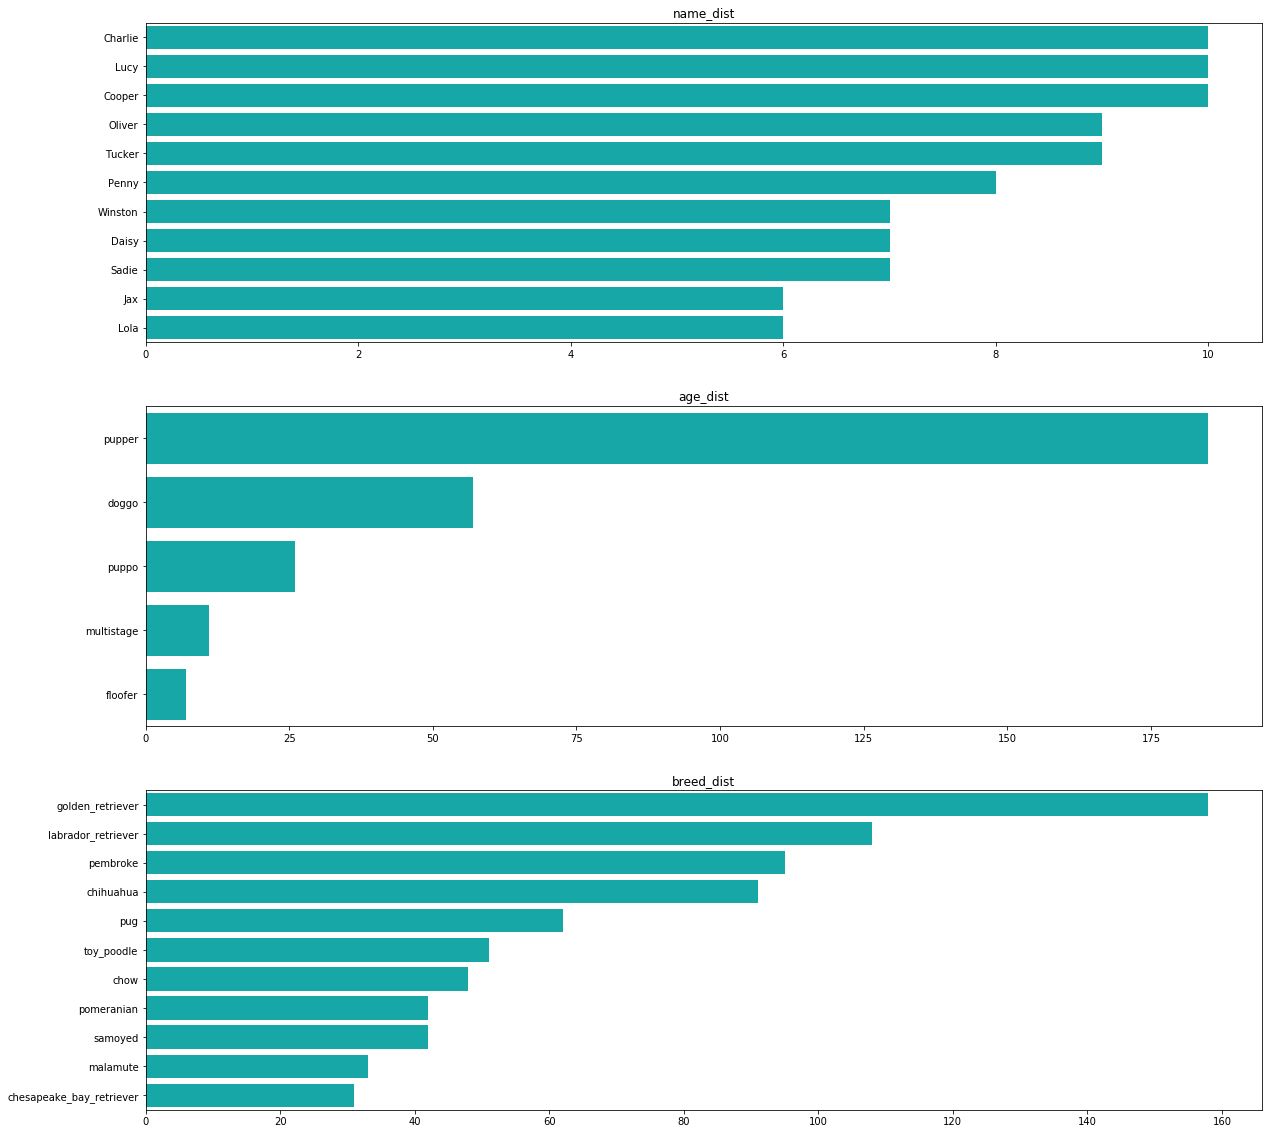

In [119]:
distlists=[namedist,agedist,breeddist]
subpos= [311,312,313]
titles= ['name_dist','age_dist','breed_dist']
plt.figure(figsize=(20,20))
for subpo,distlist,title in zip(subpos,distlists,titles):
    plt.subplot(subpo)
    sns.barplot(data=masterdf,x=distlist.values[:11],y=distlist.index[:11],color='c')
    plt.title(title)

In [147]:
masterdf['retweet_count'].sort_values()

1670    16   
1655    23   
1681    41   
1662    44   
1498    45   
        ..   
53      45849
278     48265
719     52360
363     56625
691     79515
Name: retweet_count, Length: 1686, dtype: int64

In [185]:
masterdf[masterdf['retweet_count']==16]

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls
1670,666102155909144576,2015-11-16 03:55:04,NaN,NaN,1.1,english_setter,16,81,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10,https://twitter.com/dog_rates/status/666102155909144576/photo/1


In [175]:
masterdf['retweet_count'].corr(masterdf['favourite_count'])

0.9131756722866896

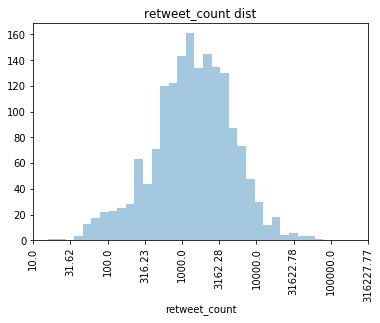

In [247]:
sns.distplot(masterdf['retweet_count'].apply(lambda x: np.log10(x)),kde=False)
loc,label=plt.xticks()
plt.xticks(loc,np.round(10**loc,2),rotation=90)
plt.title('retweet_count dist');

In [255]:
masterdf['favourite_count'].sort_values()

1670    81    
1655    107   
1681    111   
1662    113   
1677    115   
       ...    
100     106827
363     107015
53      107956
691     131075
278     132810
Name: favourite_count, Length: 1686, dtype: int64

[1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


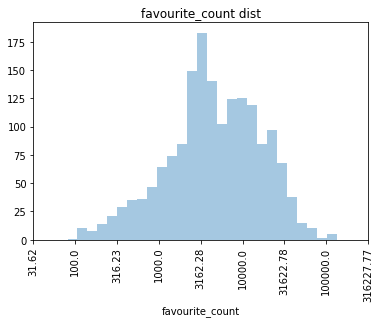

In [319]:
sns.distplot(masterdf['favourite_count'].apply(lambda x: np.log10(x)),kde=False)
loc,label=plt.xticks()
print(loc)
plt.xticks(loc,np.round(10**loc,2),rotation=90)
plt.title('favourite_count dist');

> favourite_count per retweet

In [269]:
masterdf['fav_per_retweet']=masterdf['favourite_count']/masterdf['retweet_count']
masterdf.describe()

,quotient,retweet_count,favourite_count,fav_per_retweet
count,1400.000000,1686.000000,1686.000000,1686.000000
mean,1.149143,2817.118031,9233.109727,3.435343
std,0.209835,4807.199770,12583.246963,1.119640
min,1.000000,16.000000,81.000000,1.097147
25%,1.000000,649.250000,2163.250000,2.643948
50%,1.100000,1437.500000,4440.000000,3.262246
75%,1.200000,3247.750000,11656.750000,3.996168
max,7.500000,79515.000000,132810.000000,11.429577


In [286]:
masterdf[masterdf['fav_per_retweet']==masterdf['fav_per_retweet'].min()]

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
272,824325613288833024,2017-01-25 18:38:36,NaN,pupper,1.3,pembroke,11848,12999,Retweet the h*ck out of this 13/10 pupper #BellLetsTalk,https://twitter.com/dog_rates/status/824325613288833024/photo/1,1.097147


In [288]:
masterdf[masterdf['fav_per_retweet']==masterdf['fav_per_retweet'].max()]

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
121,859607811541651456,2017-05-03 03:17:27,NaN,puppo,1.3,golden_retriever,1704,19476,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10,https://twitter.com/dog_rates/status/859607811541651456/photo/1,11.429577


[-0.2  0.   0.2  0.4  0.6  0.8  1.   1.2]


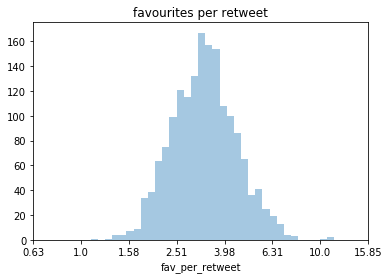

In [317]:
sns.distplot(masterdf['fav_per_retweet'].apply(lambda x: np.log10(x)),kde=False)
loc,label=plt.xticks()
print(loc)
plt.xticks(loc,np.round(10**loc,2))
plt.title('favourites per retweet');

> bivariate

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


[1.25892541e+000 1.00000000e+001 1.00000000e+010 1.00000000e+100
             inf             inf             inf             inf
             inf]


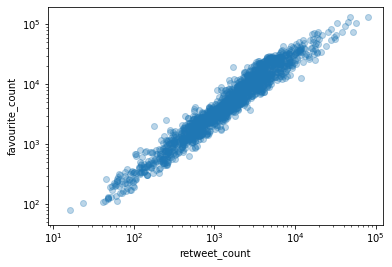

In [321]:
sns.regplot(data=masterdf, x='retweet_count',y='favourite_count',scatter_kws={'alpha':0.3},fit_reg= False)
plt.yscale('log')
plt.xscale('log')
xloc,xlable=plt.xticks()
print(10**xloc)